Confusion Matrix
119|9
--------
11|121
Accuracy: 0.923076923077
Precision: 0.9296875
Recall: 0.915384615385
F1 Score: 0.922480620155


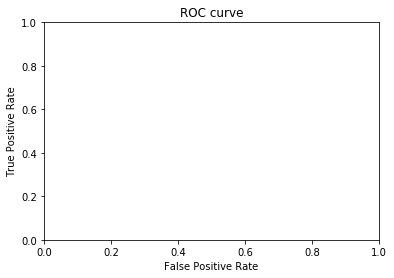

In [5]:
import os
import math
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
#Common Functions:
def get_emails(path):
    documents = os.listdir("./EmailsData/"+path)
    emails=[]
    total=len(documents)
    for file in documents:
        f = open("./EmailsData/"+path+"/" + file)
        emails.append(f.read())
    return emails,total

non_spam,total_non_spam=get_emails("nonspam-train")
spam,total_spam=get_emails("spam-train")
test_non_spam,test_total_non_spam=get_emails("nonspam-test")
test_spam,test_total_spam=get_emails("spam-test")

vectorizer = TfidfVectorizer(sublinear_tf = True, max_df = 0.5, stop_words = 'english')
s=spam+non_spam
X2_train_features = vectorizer.fit_transform(s)
y1_train_labels = np.zeros(total_spam)
y2_train_labels = np.ones(total_non_spam)
Y=np.append(y1_train_labels,y2_train_labels)
c = SelectKBest(chi2, k = 50)
X_train_features = c.fit_transform(X2_train_features, Y)
#a=np.array(X_train_features.toarray())
a=X_train_features.toarray()
mean0=[]
std0=[]
mean1=[]
std1=[]
for i in range(0,50):
    mean1.append(a[:350,i].mean())
    std1.append(a[:350, i].std())
    mean0.append(a[350:, i].mean())
    std0.append(a[350:, i].std())
    pass
# print mean,std
ts=test_spam+test_non_spam
x=vectorizer.transform(ts)
p=c.transform(x)
q=p.toarray()
l=0

def check(i):
    k=0
    prob0=0
    prob1=0
    for j in i:
        if float(j) is not float(0):
            if float(std0[k])!=0.0:
                r=math.exp(-(((j - mean0[k]) ** 2) / (2 * (std0[k] ** 2)))) / (math.sqrt(2 * 3.14 * (std0[k] ** 2)))
                if r!=0:
                    prob0=prob0+math.log10(r)
            if float(std1[k])!=0.0:
                r=math.exp(-(((j-mean1[k])**2)/(2*(std1[k]**2))))/(math.sqrt(2*3.14*(std1[k]**2)))
                if r!=0:
                    prob1=prob1+math.log10(r)
        k=k+1
    return prob0,prob1

TP=0
TN=0
FP=0
FN=0
for i in q[:130]:
    p0,p1=check(i)
    if p0<p1:
        TP=TP+1
    else:
        FN=FN+1
for i in q[130:]:
    p0,p1=check(i)
    if p1<p0:
        TN=TN+1
    else:
        FP=FP+1

# print TP,TN,FP,FN

print "Confusion Matrix"
print "================="
print str(TP)+"|"+str(FP)
print "--------"
print str(FN)+"|"+str(TN)

Accuracy=((TP+TN)/float(TP+TN+FP+FN))
Recall=float(TP)/(TP+FN)
Precision=float(TP)/(TP+FP)
F1_Score=2*((Precision*Recall)/float(Precision+Recall))
TPR=TP/float(TP+FN)
FPR=FP/float(FP+TN)
print "========================"
print "Accuracy: "+str(Accuracy)
print "Precision: "+str(Precision)
print "Recall: "+str(Recall)
print "F1 Score: "+str(F1_Score)
print "========================"
plt.plot(FPR, TPR)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()